# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

longitude=[]
latitude=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
city_na = []
found_city=[]

for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
        response = requests.get(query_url)
        weather_response = response.json()
        longitude.append(weather_response['coord']['lon'])
        latitude.append(weather_response['coord']['lat'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        found_city.append(city)
        print(city)
    except:
        city_na.append(city)

mar del plata
busselton
olafsvik
fort nelson
athabasca
clyde river
port blair
vaini
hermanus
bambanglipuro
teya
spartanburg
havelock
beringovskiy
tasiilaq
qaanaaq
kitimat
seoul
mataura
provideniya
dikson
rikitea
cherskiy
meulaboh
chuy
kapaa
lyantonde
teguldet
xiongyue
torbay
ushuaia
hilo
kihei
kodiak
albany
betsiamites
tsumeb
clearlake
bluff
yumen
sumbawanga
ribeira grande
nikolskoye
shengjin
honningsvag
jamestown
pampa
bredasdorp
cape town
camana
vila franca do campo
adilabad
buala
ponta do sol
urucara
culebra
mahebourg
magan
kaitangata
wangqing
mana
talakan
longyearbyen
castro
makakilo city
arraial do cabo
victoria
japura
whitianga
umm lajj
petropavlovsk-kamchatskiy
mosjoen
novobureyskiy
tomatlan
tuktoyaktuk
vardo
new norfolk
san quintin
rock sound
east london
berdigestyakh
punta arenas
tiksi
indianola
pevek
pauini
praia da vitoria
turan
butaritari
wonthaggi
walvis bay
groningen
carnarvon
barrow
beyneu
guilin
geraldton
fallon
moron
hobart
coruripe
alice
saint george
viamao
port alfre

In [4]:
weather_response = response.json()
weather_response

{'coord': {'lon': 169.2667, 'lat': -19.55},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 86,
  'feels_like': 94.71,
  'temp_min': 86,
  'temp_max': 86,
  'pressure': 1006,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 4.74, 'deg': 158},
 'clouds': {'all': 75},
 'dt': 1613100972,
 'sys': {'type': 1,
  'id': 7317,
  'country': 'VU',
  'sunrise': 1613068418,
  'sunset': 1613114453},
 'timezone': 39600,
 'id': 2136825,
 'name': 'Isangel',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({'City': found_city,
                           'Longitude': longitude,
                           'Latitude': latitude,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date})
weather_df

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-57.5575,-38.0023,71.01,88,90,16.11,AR,1613100896
1,busselton,115.3333,-33.6500,73.31,42,0,1.95,AU,1613100798
2,olafsvik,-23.7142,64.8945,37.99,76,97,19.35,IS,1613100896
3,fort nelson,-122.7002,58.8053,-4.00,71,90,2.30,CA,1613100646
4,athabasca,-113.2854,54.7169,-13.00,70,100,13.80,CA,1613100896
...,...,...,...,...,...,...,...,...,...
537,krivodol,23.4844,43.3744,28.17,81,5,17.11,BG,1613100971
538,rurrenabaque,-67.5278,-14.4413,70.52,94,100,1.72,BO,1613100971
539,mulchen,-72.2333,-37.7167,62.80,78,99,5.35,CL,1613100971
540,bure,37.0667,10.7000,53.69,41,30,4.03,ET,1613100972


In [6]:
weather_df.loc[weather_df['Humidity']>100]

,City,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
weather_df.to_csv(output_data_file,index=False)

In [8]:
weather_df.describe()

,Longitude,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,13.530468,20.629358,48.090498,74.057196,55.481550,8.279483,1.613101e+09
std,91.167102,33.486456,32.793380,19.164104,39.895921,6.576783,7.487509e+01
min,-175.200000,-54.800000,-41.800000,13.000000,0.000000,0.020000,1.613100e+09
25%,-66.594725,-7.165050,22.242500,65.250000,9.000000,3.542500,1.613101e+09
50%,18.030450,21.768200,60.800000,78.000000,75.000000,6.910000,1.613101e+09
75%,92.424200,50.083425,75.200000,88.000000,94.000000,10.477500,1.613101e+09
max,179.316700,78.218600,93.200000,100.000000,100.000000,43.730000,1.613101e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

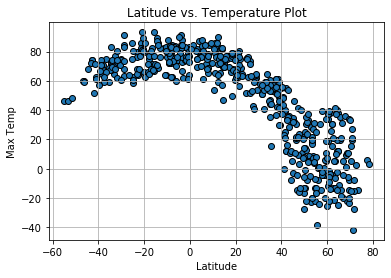

In [9]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('output_data/Lat_v_Temp.png')

## Latitude vs. Humidity Plot

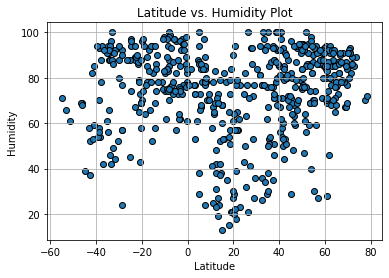

In [10]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('output_data/Lat_v_Hum.png')

## Latitude vs. Cloudiness Plot

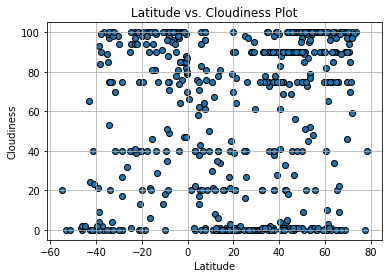

In [11]:
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('output_data/Lat_v_Cloud.png')

## Latitude vs. Wind Speed Plot

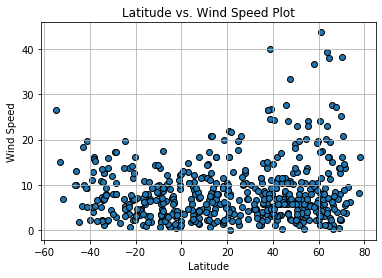

In [12]:
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolor='black')
plt.grid()
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('output_data/Lat_v_Wind.png')

## Linear Regression

In [13]:
def plot_regression(x_values,y_values,text_location):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
    predicted_y=slope*x_values+intercept
    line_equation=f'y={round(slope,2)}x + {round(intercept,2)}'
    plt.scatter(x_values,y_values)
    plt.plot(x_values,predicted_y,c='r')
    plt.annotate(line_equation,text_location,c='r',fontsize=15)
    plt.grid()
    print(f'R value is: {rvalue}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R value is: -0.8598855595318272


Text(0, 0.5, 'Max Temp')

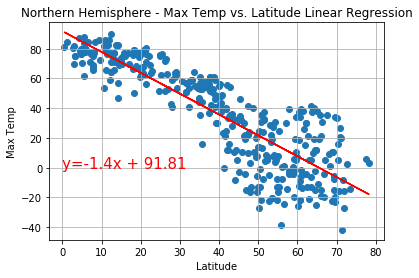

In [14]:
northern_hemi=weather_df[weather_df['Latitude']>0]
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Max Temp']
plot_regression(x_values,y_values,text_location=(0,0))
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R value is: 0.4753305678575935


Text(0, 0.5, 'Max Temp')

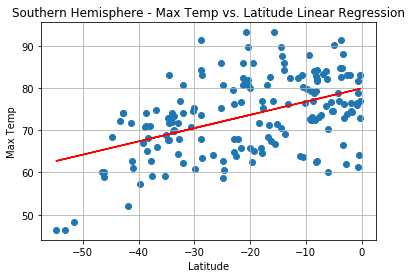

In [15]:
southern_hemi=weather_df[weather_df['Latitude']<0]
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Max Temp']
plot_regression(x_values,y_values,(-30,40))
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value is: 0.37387675032530165


Text(0, 0.5, 'Humidity')

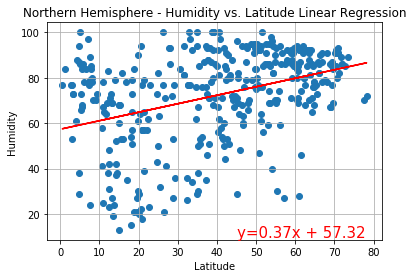

In [16]:
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Humidity']
plot_regression(x_values,y_values,(45,10))
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value is: 0.2875417453751227


Text(0, 0.5, 'Humidity')

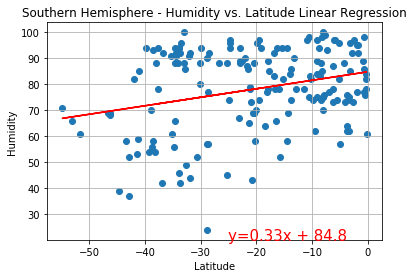

In [17]:
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Humidity']
plot_regression(x_values,y_values,(-25,20))
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value is: 0.3613262309769563


Text(0, 0.5, 'Cloudiness')

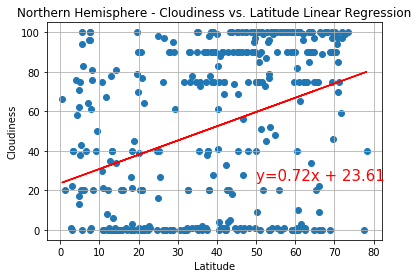

In [18]:
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Cloudiness']
plot_regression(x_values,y_values,(50,25))
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value is: 0.4708733745079981


Text(0, 0.5, 'Cloudiness')

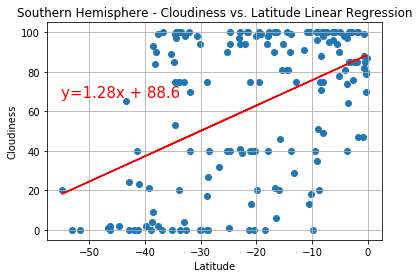

In [19]:
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Cloudiness']
plot_regression(x_values,y_values,(-55,67))
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value is: 0.1324112702560921


Text(0, 0.5, 'Wind Speed (mph)')

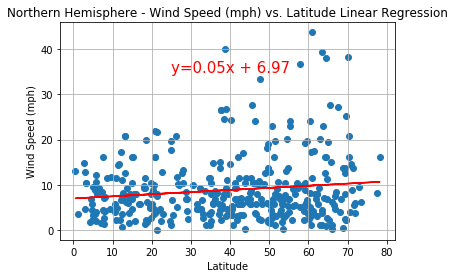

In [20]:
x_values=northern_hemi['Latitude']
y_values=northern_hemi['Wind Speed']
plot_regression(x_values,y_values,(25,35))
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value is: -0.3197375366814294


Text(0, 0.5, 'Wind Speed (mph)')

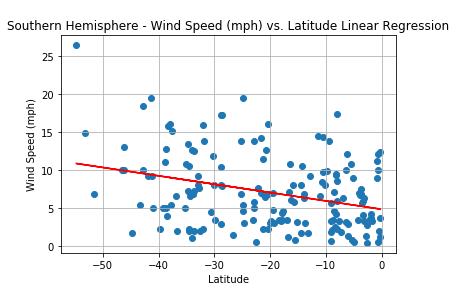

In [22]:
x_values=southern_hemi['Latitude']
y_values=southern_hemi['Wind Speed']
plot_regression(x_values,y_values,(-25,30))
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')